In [1]:
#Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
#importing the data
df_train = pd.read_csv('Data/df_modified_train.csv')
df_test = pd.read_csv('Data/df_modified_test.csv')

In [20]:
df_train.head()

,Unnamed: 0,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,29934,Technology,region_23,0,m,sourcing,1,30,3.0,1,0,0,77,0
1,6,62658,Sales & Marketing,region_2,0,f,sourcing,1,20,4.0,1,0,0,55,0
2,10,24414,R&D,region_2,0,m,other,1,25,2.0,1,1,0,76,0
3,21,36691,Sales & Marketing,region_14,0,m,other,1,24,3.0,1,1,0,55,0
4,22,6788,Sales & Marketing,region_2,0,f,other,2,40,5.0,1,1,0,51,0


In [21]:
df_train = df_train.drop('Unnamed: 0',axis=1)

In [22]:
df_test = df_test.drop('Unnamed: 0',axis=1)

In [7]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,42719,Analytics,region_21,0,m,sourcing,1,27,3.0,1,0,0,80
1,56772,Sales & Marketing,region_22,0,m,other,2,23,5.0,1,1,0,53
2,65459,Operations,region_27,0,m,other,1,26,5.0,1,1,0,56
3,12723,Sales & Marketing,region_27,0,m,sourcing,1,23,3.0,1,0,0,50
4,18612,Sales & Marketing,region_22,0,m,other,1,26,3.0,1,0,0,48


In [23]:
print(df_train.shape)
print(df_test.shape)

(54808, 14)
(23490, 13)


### Dealing with the missing data

In [9]:
df_train = df_train.dropna()

<AxesSubplot:>

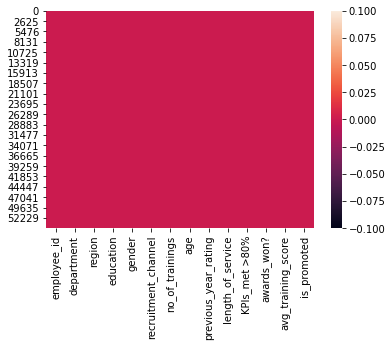

In [10]:
sns.heatmap(df_train.isnull())

<AxesSubplot:>

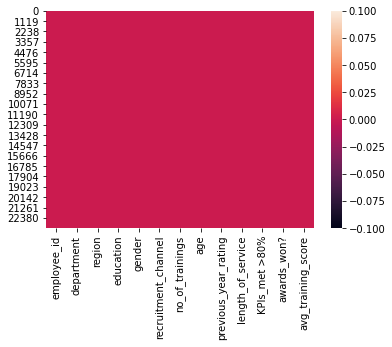

In [11]:
sns.heatmap(df_test.isnull())

### Exploratory Data Analysis

<AxesSubplot:xlabel='region', ylabel='Count'>

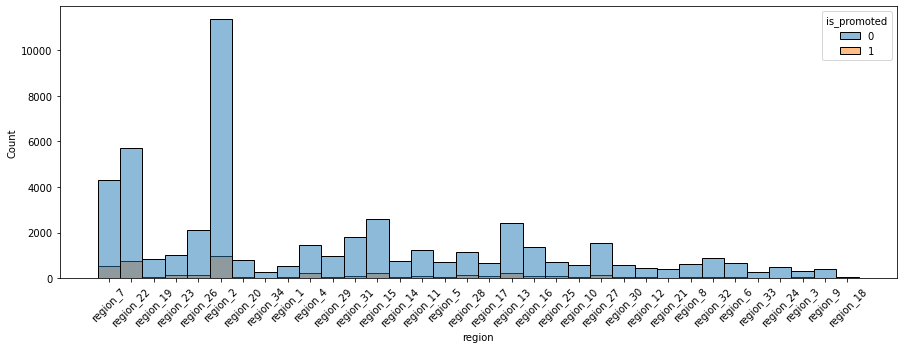

In [54]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 45)
sns.histplot(x = 'region',data=df_train,hue = 'is_promoted')

In [35]:
col = list(df_train['region'].value_counts().index)
fraction = []
for i in range(len(col)):
    x = (df_train['region'].value_counts()[i])
    y = df_train[df_train['region'] == col[i]]['is_promoted'].value_counts()[1]
    fraction.append((y/x)*100)
    
df_region = pd.concat([pd.DataFrame(col),pd.DataFrame(fraction)],axis=1)
df_region.columns = ['region','fraction']

<AxesSubplot:xlabel='region', ylabel='fraction'>

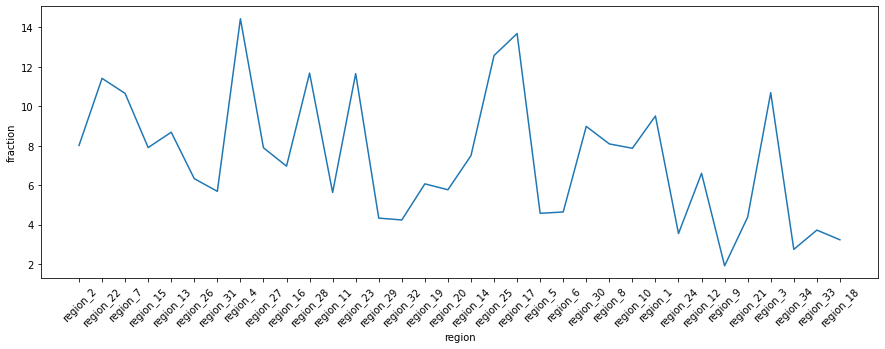

In [50]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
sns.lineplot(x='region',y = 'fraction',data=df_region)

In [10]:
df_train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

<AxesSubplot:xlabel='department', ylabel='Count'>

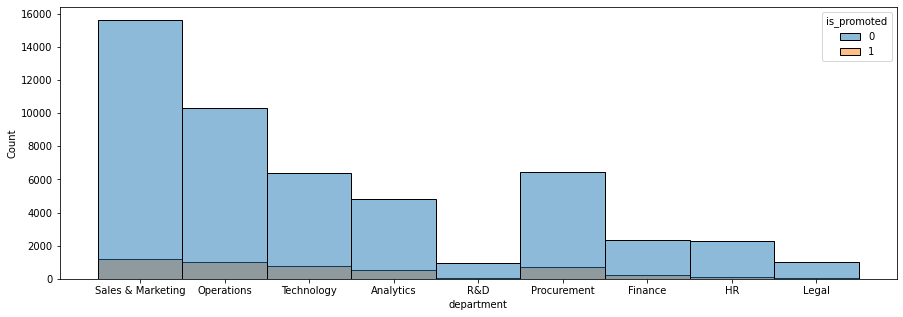

In [16]:
plt.figure(figsize=(15,5))
sns.histplot(x = 'department', data = df_train, hue = 'is_promoted')

In [51]:
col = list(df_train['department'].value_counts().index)
fraction = []
for i in range(len(col)):
    x = (df_train['department'].value_counts()[i])
    y = df_train[df_train['department'] == col[i]]['is_promoted'].value_counts()[1]
    fraction.append((y/x)*100)
    
df_dep = pd.concat([pd.DataFrame(col),pd.DataFrame(fraction)],axis=1)
df_dep.columns = ['department','fraction']

<AxesSubplot:xlabel='department', ylabel='fraction'>

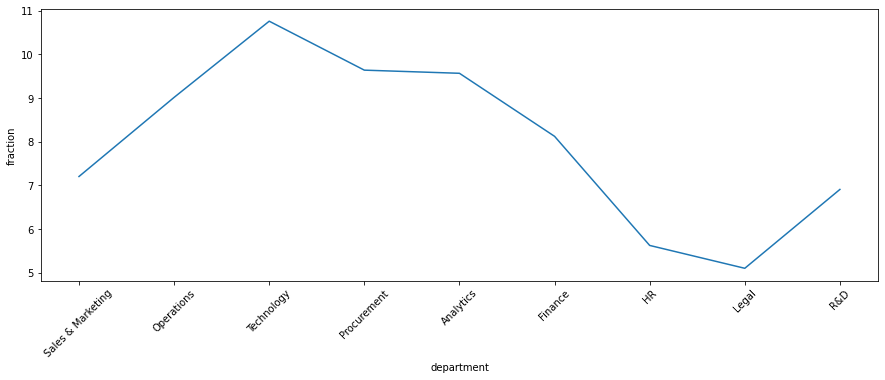

In [52]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
sns.lineplot(x='department',y = 'fraction',data=df_dep)

In [31]:
def func(string):
    if string == '0':
        return "Bachelor's"
    else:
        return string

In [32]:
df_train['education'] = df_train['education'].apply(lambda x:func(x))

In [37]:
col = list(df_train['education'].value_counts().index)
fraction = []
for i in range(len(col)):
    x = (df_train['education'].value_counts()[i])
    y = df_train[df_train['education'] == col[i]]['is_promoted'].value_counts()[1]
    fraction.append((y/x)*100)
    
df_dep = pd.concat([pd.DataFrame(col),pd.DataFrame(fraction)],axis=1)
df_dep.columns = ['education','fraction']

<AxesSubplot:xlabel='education', ylabel='fraction'>

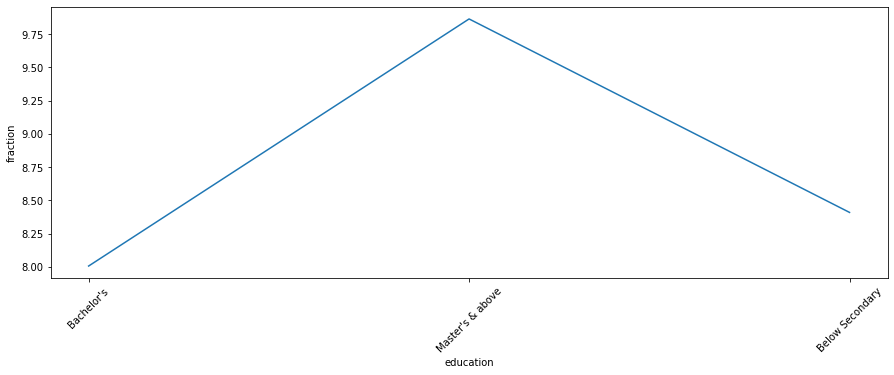

In [39]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
sns.lineplot(x='education',y = 'fraction',data=df_dep)

<AxesSubplot:xlabel='gender', ylabel='Count'>

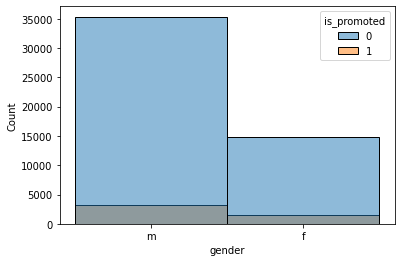

In [43]:
sns.histplot(x = 'gender',data=df_train,hue='is_promoted')

<AxesSubplot:xlabel='gender', ylabel='fraction'>

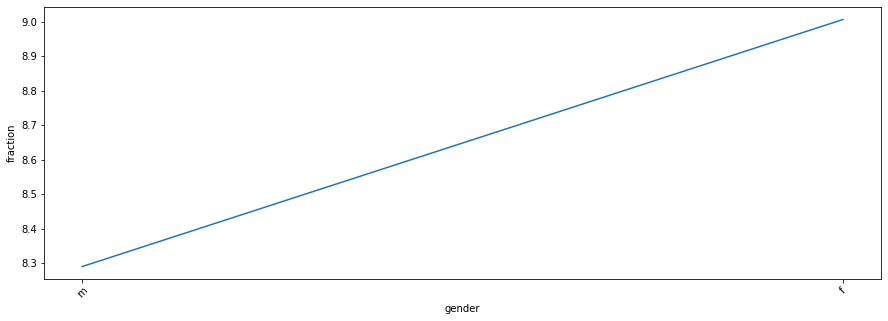

In [44]:
col = list(df_train['gender'].value_counts().index)
fraction = []
for i in range(len(col)):
    x = (df_train['gender'].value_counts()[i])
    y = df_train[df_train['gender'] == col[i]]['is_promoted'].value_counts()[1]
    fraction.append((y/x)*100)
    
df_dep = pd.concat([pd.DataFrame(col),pd.DataFrame(fraction)],axis=1)
df_dep.columns = ['gender','fraction']

plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
sns.lineplot(x='gender',y = 'fraction',data=df_dep)

<AxesSubplot:xlabel='recruitment_channel', ylabel='Count'>

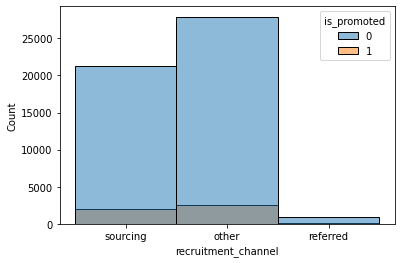

In [46]:
sns.histplot(x='recruitment_channel',data=df_train,hue = 'is_promoted')

<AxesSubplot:xlabel='recruitment_channel', ylabel='fraction'>

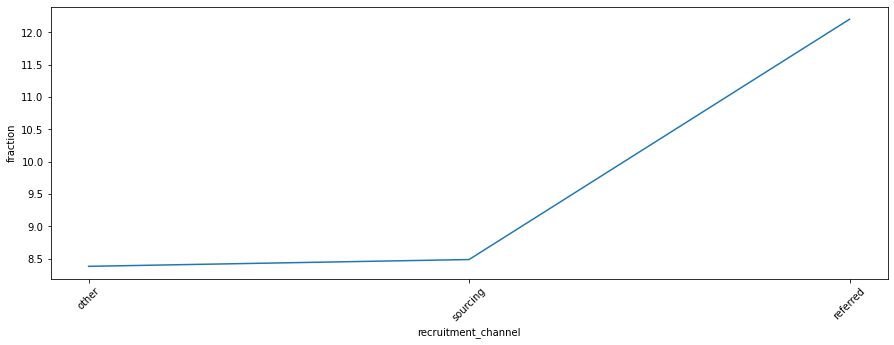

In [47]:
col = list(df_train['recruitment_channel'].value_counts().index)
fraction = []
for i in range(len(col)):
    x = (df_train['recruitment_channel'].value_counts()[i])
    y = df_train[df_train['recruitment_channel'] == col[i]]['is_promoted'].value_counts()[1]
    fraction.append((y/x)*100)
    
df_dep = pd.concat([pd.DataFrame(col),pd.DataFrame(fraction)],axis=1)
df_dep.columns = ['recruitment_channel','fraction']

plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
sns.lineplot(x='recruitment_channel',y = 'fraction',data=df_dep)

<AxesSubplot:xlabel='no_of_trainings', ylabel='Count'>

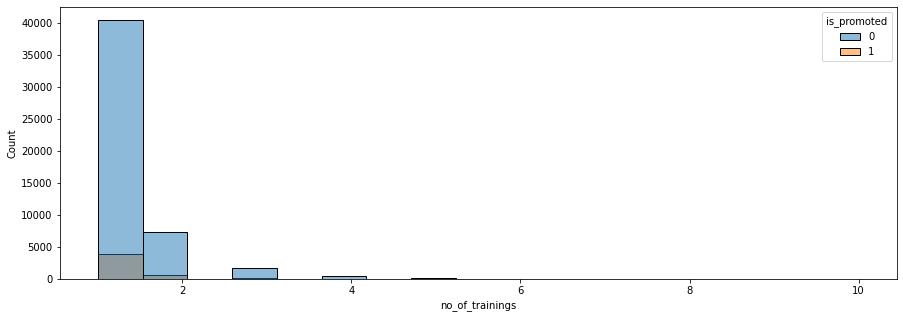

In [54]:
plt.figure(figsize=(15,5))
sns.histplot(x='no_of_trainings',data=df_train,hue='is_promoted')

<AxesSubplot:xlabel='age', ylabel='fraction'>

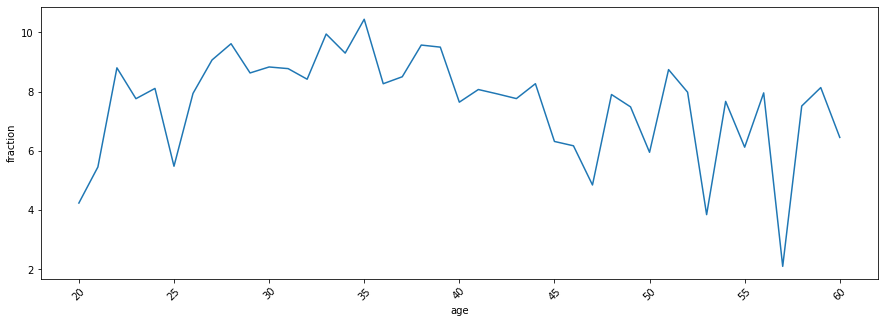

In [65]:
col = list(df_train['age'].value_counts().index)
fraction = []
for i in range(len(col)):
    x = (df_train['age'].value_counts()[col[i]])
    y = df_train[df_train['age'] == col[i]]['is_promoted'].value_counts()[1]
    fraction.append((y/x)*100)
    
df_dep = pd.concat([pd.DataFrame(col),pd.DataFrame(fraction)],axis=1)
df_dep.columns = ['age','fraction']

plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
sns.lineplot(x='age',y = 'fraction',data=df_dep)

<AxesSubplot:xlabel='previous_year_rating', ylabel='Count'>

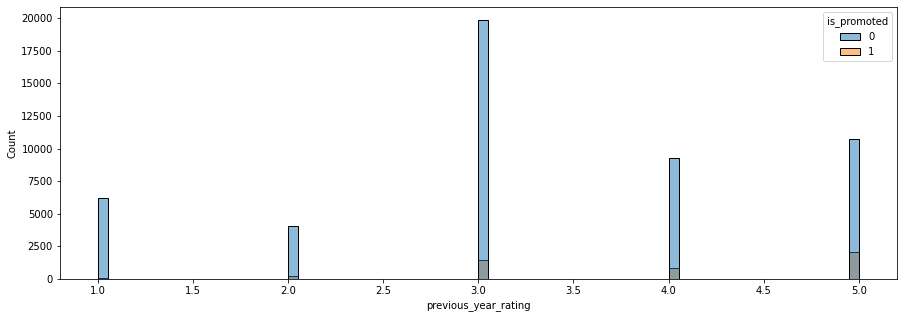

In [68]:
plt.figure(figsize=(15,5))
sns.histplot(x='previous_year_rating',data=df_train,hue='is_promoted')

<AxesSubplot:xlabel='previous_year_rating', ylabel='fraction'>

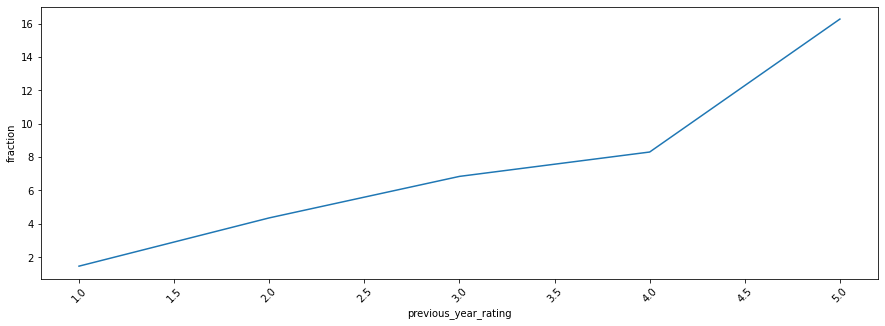

In [69]:
col = list(df_train['previous_year_rating'].value_counts().index)
fraction = []
for i in range(len(col)):
    x = (df_train['previous_year_rating'].value_counts()[col[i]])
    y = df_train[df_train['previous_year_rating'] == col[i]]['is_promoted'].value_counts()[1]
    fraction.append((y/x)*100)
    
df_dep = pd.concat([pd.DataFrame(col),pd.DataFrame(fraction)],axis=1)
df_dep.columns = ['previous_year_rating','fraction']

plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
sns.lineplot(x='previous_year_rating',y = 'fraction',data=df_dep)

<AxesSubplot:xlabel='length_of_service', ylabel='fraction'>

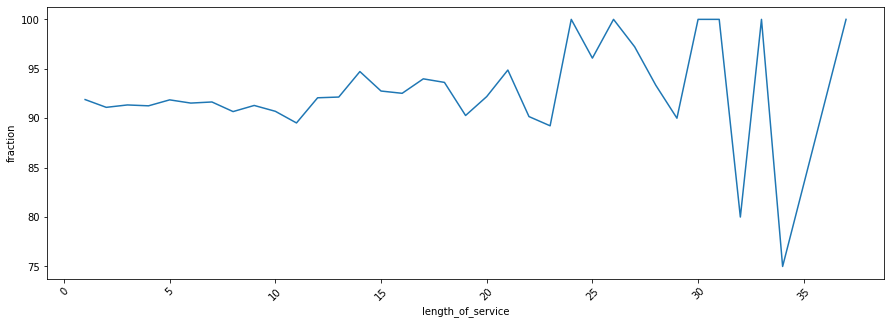

In [79]:
col = list(df_train['length_of_service'].value_counts().index)
fraction = []
for i in range(len(col)):
    x = (df_train['length_of_service'].value_counts()[col[i]])
    y = df_train[df_train['length_of_service'] == col[i]]['is_promoted'].value_counts()[0]
    fraction.append((y/x)*100)
    
df_dep = pd.concat([pd.DataFrame(col),pd.DataFrame(fraction)],axis=1)
df_dep.columns = ['length_of_service','fraction']

plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
sns.lineplot(x='length_of_service',y = 'fraction',data=df_dep)

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='Count'>

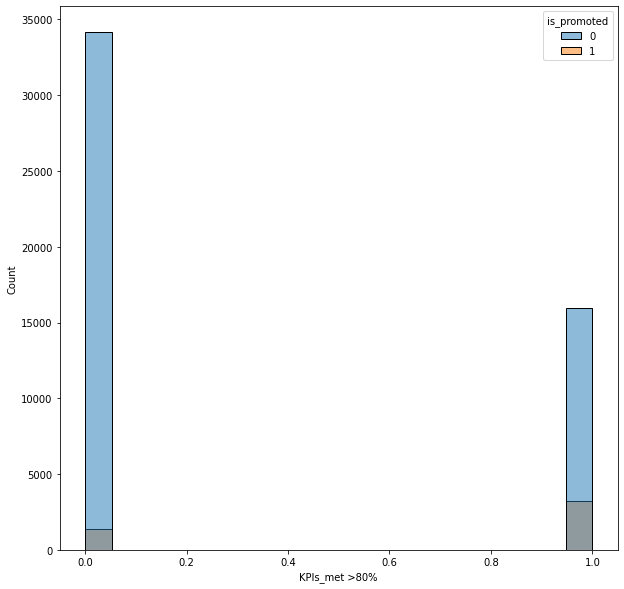

In [82]:
plt.figure(figsize=(10,10))
sns.histplot(x='KPIs_met >80%',data=df_train,hue='is_promoted')

<AxesSubplot:xlabel='awards_won?', ylabel='Count'>

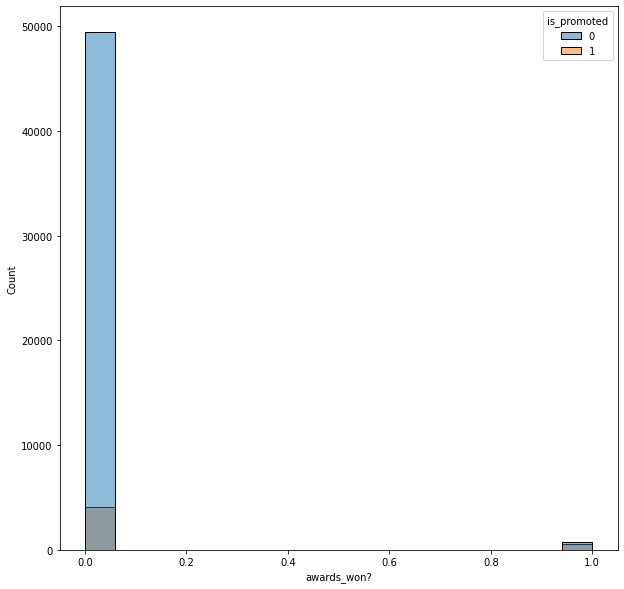

In [86]:
plt.figure(figsize=(10,10))
sns.histplot(x='awards_won?',data=df_train,hue='is_promoted')

In [99]:
df_train['avg_training_score'].value_counts()

50    2727
49    2691
48    2462
51    2376
60    2148
      ... 
98      37
99      35
41      26
40       5
39       2
Name: avg_training_score, Length: 61, dtype: int64

### Data Cleaning

In [103]:
df_test['education'] = df_test['education'].apply(lambda x:func(x))

In [123]:
col = list(df_train[df_train['no_of_trainings']==10].index)
df_train = df_train.drop(col)
df_train = df_train.reset_index()
df_train = df_train.drop('index',axis=1)

In [146]:
df_train = df_train.drop(33679)
df_train = df_train.reset_index()
df_train = df_train.drop('index',axis=1)

In [148]:
department = pd.get_dummies(df_train['department'])
region = pd.get_dummies(df_train['region'])
education = pd.get_dummies(df_train['education'])
gender = pd.get_dummies(df_train['gender'])
channel = pd.get_dummies(df_train['recruitment_channel'])
training = pd.get_dummies(df_train['no_of_trainings'])
age = pd.get_dummies(df_train['age'])
rating = pd.get_dummies(df_train['previous_year_rating'])
len_service = pd.get_dummies(df_train['length_of_service'])
kpi = pd.get_dummies(df_train['KPIs_met >80%'])
award = pd.get_dummies(df_train['awards_won?'])

In [152]:
df_train_mod = pd.concat([df_train['employee_id'],department,region,education,gender,channel,training,age,rating,len_service,kpi,award,df_train['avg_training_score'],df_train['is_promoted']],axis=1)

In [155]:
df_train_mod.to_csv('df_train_mod.csv')

In [156]:
department = pd.get_dummies(df_test['department'])
region = pd.get_dummies(df_test['region'])
education = pd.get_dummies(df_test['education'])
gender = pd.get_dummies(df_test['gender'])
channel = pd.get_dummies(df_test['recruitment_channel'])
training = pd.get_dummies(df_test['no_of_trainings'])
age = pd.get_dummies(df_test['age'])
rating = pd.get_dummies(df_test['previous_year_rating'])
len_service = pd.get_dummies(df_test['length_of_service'])
kpi = pd.get_dummies(df_test['KPIs_met >80%'])
award = pd.get_dummies(df_test['awards_won?'])

In [158]:
df_test_mod = pd.concat([df_test['employee_id'],department,region,education,gender,channel,training,age,rating,len_service,kpi,award,df_test['avg_training_score']],axis=1)

In [160]:
print(df_train_mod.shape)
print(df_test_mod.shape)

(54802, 147)
(23490, 146)


In [161]:
df_test_mod.to_csv('df_test_mod.csv')